In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the same Excel file from prob1
sharesXLS = "../prob1/AppendixB_Shares.xls"  # path to file in prob1 folder

In [9]:
# Load CSV from prob 1

fruits_men_df = pd.read_csv("../prob1/fruits_men.csv", index_col=0)
fruits_women_df = pd.read_csv("../prob1/fruits_women.csv", index_col=0)
dairy_men_df = pd.read_csv("../prob1/dairy_men.csv", index_col=0)
dairy_women_df = pd.read_csv("../prob1/dairy_women.csv", index_col=0)


In [15]:
# Calculating Percent Change

# Formula: ((Final - Initial) / Initial ) * 100

# Fruits
fruits_men_pc = ((fruits_men_df.loc['07-08 FAH'] - fruits_men_df.loc['94-98 FAH'])
                 / fruits_men_df.loc['07-08 FAH']) * 100
fruits_women_pc = ((fruits_women_df.loc['07-08 FAH'] - fruits_women_df.loc['94-98 FAH'])
                 / fruits_women_df.loc['94-98 FAH']) * 100

# Dairy
dairy_men_pc = ((dairy_men_df.loc['07-08 FAH'] - dairy_men_df.loc['94-98 FAH'])
                 / dairy_men_df.loc['07-08 FAH']) * 100
dairy_women_pc = ((dairy_women_df.loc['07-08 FAH'] - dairy_women_df.loc['94-98 FAH'])
                 / dairy_women_df.loc['07-08 FAH']) * 100

In [19]:
# Combine Fruits and Dairy

def combine(fruit_change, dairy_change):
    # Sort Values
    fruit_sort = fruit_change.sort_values()
    dairy_sort = dairy_change.sort_values()

    # Concatenate Data Together
    combined = pd.concat([fruit_sort, pd.Series([None], index=[" "]), dairy_sort])
    return combined

men_combined = combine(fruits_men_pc, dairy_men_pc)
women_combined = combine(fruits_women_pc, dairy_women_pc)

In [31]:
# Plot Bar Charts

def plot_percent_change(data, title, filename):
    plt.figure(figsize=(10,6))
    
    # Use the recommended approach from the warning message
    # clean_data = data.fillna(0).infer_objects(copy=False)  # Using infer_objects with copy=False as recommended
    
    # Alternative approach if the above still shows warnings:
    pd.set_option('future.no_silent_downcasting', True)  # Uncomment this line if needed
    clean_data = data.fillna(0)
    
    plt.bar(clean_data.index, clean_data.values, color='skyblue', edgecolor='black')

    plt.axhline(0, color='black', linewidth=0.8)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.ylabel("Percent change (%)")

    plt.figtext(0.5, -0.1,
        "Data source: USDA ERS – Food Commodity Availability by Food Source (1994–2008)\n"
        "Appendix B: Consumption share tables. URL: https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
        ha='center', fontsize=8)

    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.show()

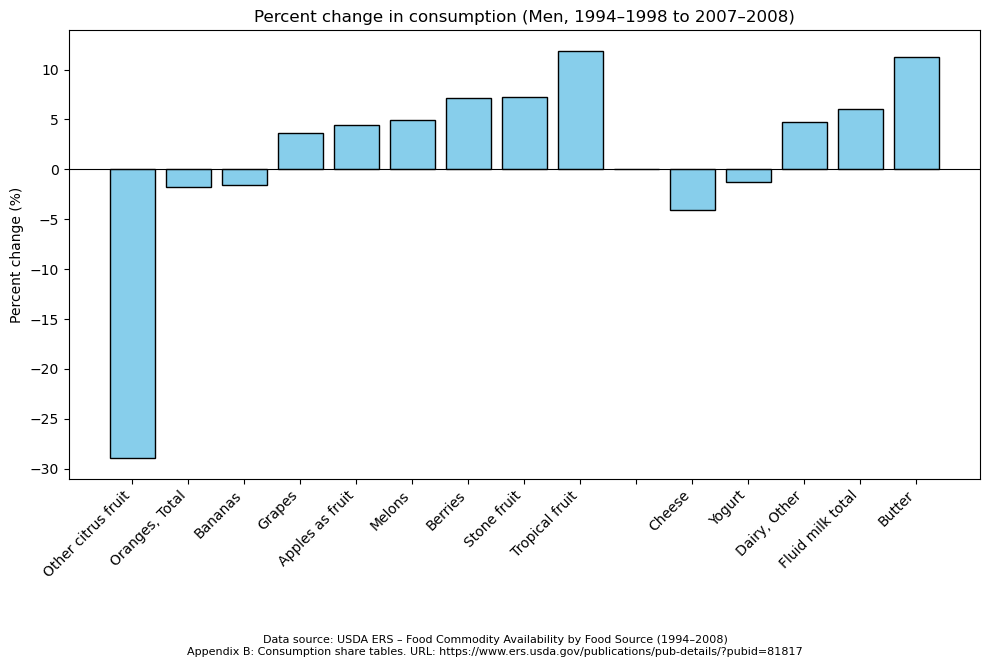

In [32]:
plot_percent_change(men_combined, "Percent change in consumption (Men, 1994–1998 to 2007–2008)", "percent_change_men.png")

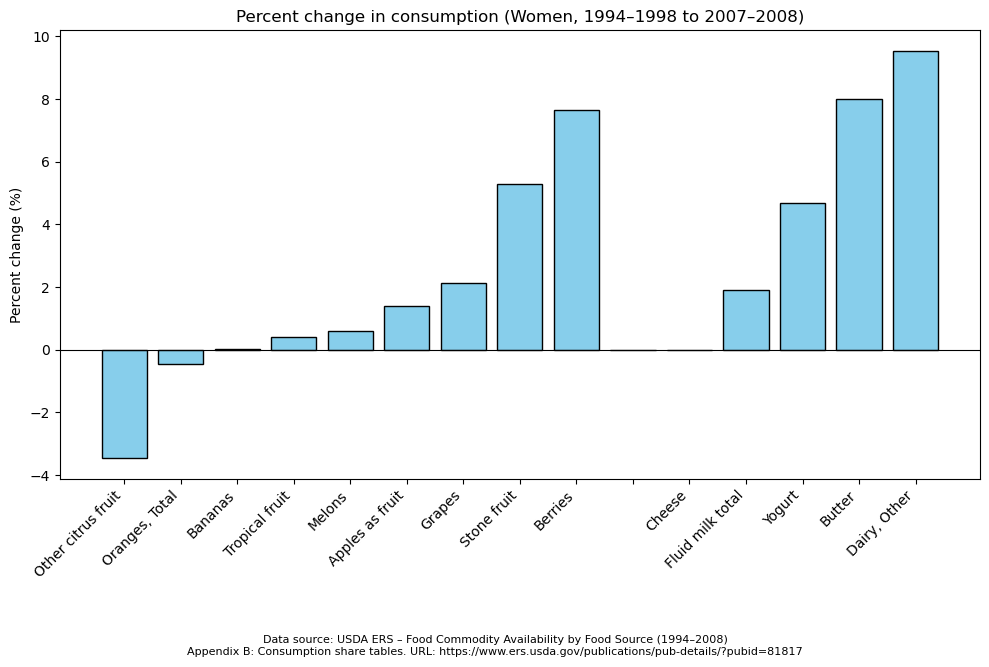

In [33]:
plot_percent_change(women_combined, "Percent change in consumption (Women, 1994–1998 to 2007–2008)", "percent_change_women.png")